In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
### PROPAGATION TESTS

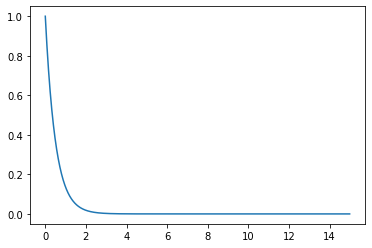

In [3]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.01   # Time step / resolution of simulation
t = np.arange(0,15,h)
tau1 = 0.5

I = np.exp(-1*t/tau1)

plt.plot(t,I)

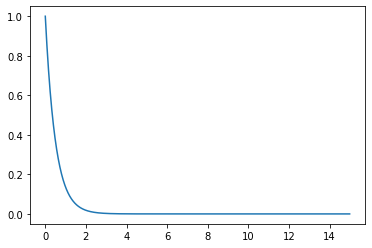

In [60]:
I_0 = 1
I2 = np.empty(len(t))
I2[0] = I_0

for i in range(len(t)-1):
    I2[i+1] = I2[i]*np.exp(-h/tau1)
    
plt.plot(t,I2)

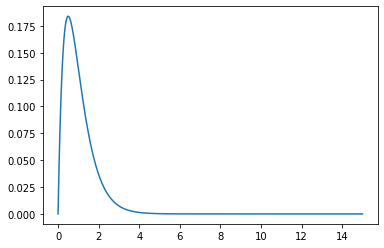

In [61]:
# numerically/graphically check alpha synapse implementation

tau1 = 0.5
C = 1

Ia = C*np.multiply(t,np.exp(-1*t/tau1))

plt.plot(t,Ia)

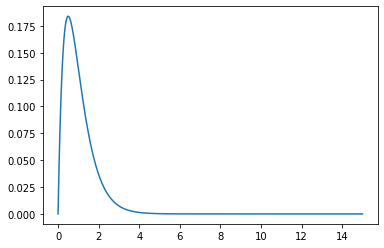

In [62]:
Ia1 = np.empty(len(t))
Ia2 = np.empty(len(t))
# No C multiplier

Ia1[0] = 0.0
Ia2[0] = 1.0

for i in range(len(t)-1):
    Ia1[i+1] = Ia1[i]*np.exp(-h/tau1) + h*np.exp(-h/tau1)*Ia2[i]
    Ia2[i+1] = Ia2[i]*np.exp(-h/tau1) 
    
plt.plot(t,Ia1)

In [63]:
max(Ia-Ia1)

6.938893903907228e-16

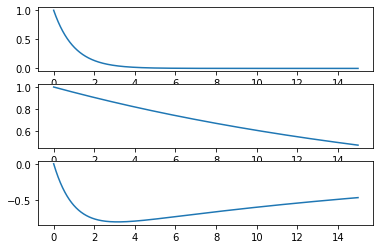

In [7]:
# try bi-exponential synapse

tau_decay = 20
tau_rise = 1

p1 = np.exp(-t/tau_decay)
p2 = np.exp(-t/tau_rise)
Ib = p1-p2

fig, ax = plt.subplots(3,1)
ax[0].plot(t,p1)
ax[1].plot(t,p2)
ax[2].plot(t,Ib)

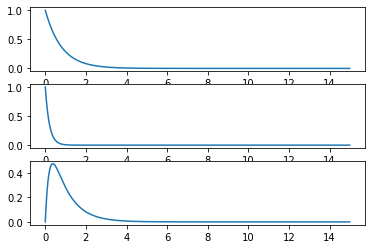

In [77]:
Ib1,Ib2,Ib3 = np.empty((3,len(t)))

Ib1[0] = 1.0
Ib2[0] = 1.0
Ib3[0] = Ib1[0]-Ib2[0]

for i in range(len(t)-1):
    Ib1[i+1] = Ib1[i]*np.exp(-h/tau_decay)
    Ib2[i+1] = Ib2[i]*np.exp(-h/tau_rise)
    Ib3[i+1] = Ib1[i+1]-Ib2[i+1]
fig,ax = plt.subplots(3,1)
ax[0].plot(t,Ib1)
ax[1].plot(t,Ib2)
ax[2].plot(t,Ib3)

In [66]:
max(Ib-Ib3)

1.1102230246251565e-16

Calculated t_peak: 0.36967849629863747
Empirical t_peak: 0.37


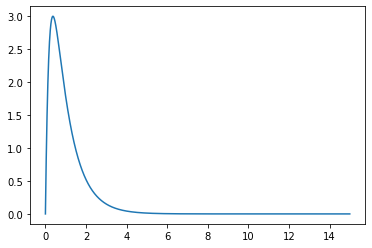

In [85]:
# Scale factor f

g_bar_syn = 3
t_peak = (tau_rise*tau_decay)/(tau_decay-tau_rise)*np.log(tau_decay/tau_rise)
print(f'Calculated t_peak: {t_peak}')
maxI = np.max(Ib3)
peak_ind = np.where(Ib3==maxI)
t_peak_emp = float(t[peak_ind])
print(f'Empirical t_peak: {t_peak_emp}')

f = 1/(np.exp(-t_peak/tau_decay)-np.exp(-t_peak/tau_rise))

Ic1,Ic2,Ic3 = np.empty((3,len(t)))

Ic1[0] = g_bar_syn*f
Ic2[0] = g_bar_syn*f
Ic3[0] = Ic1[0]-Ic2[0]

for i in range(len(t)-1):
    Ic1[i+1] = Ic1[i]*np.exp(-h/tau_decay)
    Ic2[i+1] = Ic2[i]*np.exp(-h/tau_rise)
    Ic3[i+1] = Ic1[i+1]-Ic2[i+1]
fig,ax = plt.subplots()
ax.plot(t,Ic3)

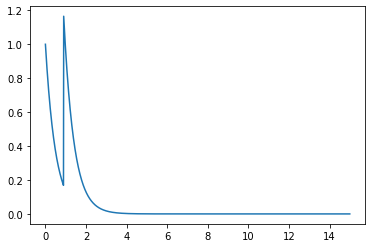

In [106]:
# Summing in a new input

t0 = 0.9
ind = np.where(t==t0)
ind = int(ind[0])
I2 = np.zeros(len(t))

I1 = np.exp(-1*t/tau1)
I2[ind:] = np.exp(-1*(t[ind:]-t0)/tau1)
Is = I1+I2

plt.plot(t,Is)

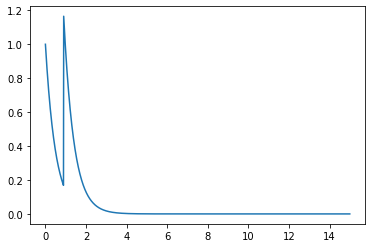

In [114]:
I_0 = 1
I2 = np.empty(len(t))
I2[0] = I_0
input = np.zeros(len(t))
input[ind-1] = 1

for i in range(len(t)-1):
    I2[i+1] = I2[i]*np.exp(-h/tau1)
    I2[i+1] += 1*input[i]
    
plt.plot(t,I2)

In [115]:
max(Is-I2)

1.5543122344752192e-15